In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
df = pd.read_csv("Bengaluru_House_Data.csv")

In [3]:
df.head(3)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00


In [4]:
df.shape

(13320, 9)

Cleaning Data

In [5]:
df.groupby("area_type")["area_type"].aggregate("count")

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [6]:
df.drop(["area_type", "availability", "society"], inplace=True, axis="columns")

In [7]:
df

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Richards Town,4 BHK,3600,5.0,NaN,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [8]:
df.isna().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [9]:
df.dropna(inplace=True)
df.shape

(12710, 6)

In [10]:
df["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

In [11]:
def room_num(x):
        return int(x.split()[0])

In [12]:
df["room_num"] = df["size"].apply(room_num)

In [13]:
df.head(2)

,location,size,total_sqft,bath,balcony,price,room_num
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4


In [14]:
df.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [15]:
df.bath.unique()

array([ 2.,  5.,  3.,  4.,  1.,  8.,  7.,  6.,  9., 27., 11., 12., 10.,
       40., 15., 13.])

In [16]:
df.drop(["balcony"], axis="columns", inplace=True)

In [17]:
df.head(2)

,location,size,total_sqft,bath,price,room_num
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4


In [18]:
df.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [19]:
df_mod = df.copy()
df_mod.head(2)

,location,size,total_sqft,bath,price,room_num
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4


In [20]:
def convert_to_floats(x):
    tokens = x.split("-")
    if len(tokens) == 2:
        new_num = (float(tokens[0]) + float(tokens[1]))/2
        return new_num
    else:
        try:
            return float(x)
        except:
            return None


In [21]:
df_mod["total_sqft"] = df["total_sqft"].apply(convert_to_floats)

In [22]:
df_mod.head(2)

,location,size,total_sqft,bath,price,room_num
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4


In [23]:
df_mod["price/sqft"] = (df_mod["price"]/df_mod["total_sqft"])*100_000

In [24]:
df_mod.head(2)

,location,size,total_sqft,bath,price,room_num,price/sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615


In [25]:
df_mod.rename(columns={"room_num": "num_of_rooms", "price/sqft": "price_per_sqft"}, inplace=True)
df_mod.drop(["size"], axis="columns", inplace=True)

In [26]:
df_mod.head(2)

,location,total_sqft,bath,price,num_of_rooms,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615


In [27]:
df_mod["location"] = df_mod["location"].apply(lambda i: i.strip())
len(df_mod["location"].unique())

1254

In [28]:
location_stat_vector = df_mod.groupby("location")
# produces a column called location
location_stat_vector = location_stat_vector["location"].aggregate("count")
location_stat_vector.sort_values(ascending=False)

location
Whitefield              515
Sarjapur  Road          372
Electronic City         302
Kanakpura Road          261
Thanisandra             234
                       ... 
Kanakapura  Rod           1
Kanakapura Main Road      1
Kanakapura Road           1
Kanakapura Road,          1
whitefiled                1
Name: location, Length: 1254, dtype: int64

In [29]:
location_stat_vector <=12

location
1 Annasandrapalya                                  True
1 Giri Nagar                                       True
1 Ramamurthy Nagar                                 True
12th cross srinivas nagar banshankari 3rd stage    True
1A Block Koramangala                               True
                                                   ... 
south                                              True
t.c palya                                          True
tc.palya                                           True
vinayakanagar                                      True
whitefiled                                         True
Name: location, Length: 1254, dtype: bool

In [30]:
df_mod["location"] = df_mod["location"].apply(lambda x: "other" if x in location_stat_vector[location_stat_vector <=12] else x)

In [31]:
df_mod.head()

,location,total_sqft,bath,price,num_of_rooms,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


Removing outliers and anomalies

In [32]:
def cleaning_anomalies(df):
    new_df = pd.DataFrame()
    for key, value in df.groupby("location"):
        mean = np.mean(value.price_per_sqft)
        stdv = np.std(value.price_per_sqft)
        cleaned_df = value[(value.price_per_sqft > (mean - stdv)) & (value.price_per_sqft <= (mean + stdv))]
        
        new_df = pd.concat([new_df, cleaned_df], ignore_index=True)
    return new_df

In [33]:
df_cleaned = cleaning_anomalies(df_mod)

In [34]:
df_cleaned.head(2)

,location,total_sqft,bath,price,num_of_rooms,price_per_sqft
0,1st Phase JP Nagar,2825.0,4.0,250.0,4,8849.557522
1,1st Phase JP Nagar,1875.0,3.0,167.0,3,8906.666667


In [35]:
def scatter_plt(data_frame, location: str):
    two_bedroom = data_frame[(data_frame["location"] == location) & (data_frame["num_of_rooms"] ==2)]
    three_bedroom = data_frame[(data_frame["location"] == location) & (data_frame["num_of_rooms"] == 3)]
    matplotlib.rcParams["figure.figsize"] = (15, 7)
    plt.scatter(two_bedroom["total_sqft"], two_bedroom["price_per_sqft"], color="red", label="2 bedroom house", s=50)
    plt.scatter(three_bedroom["total_sqft"], three_bedroom["price_per_sqft"], color="blue", marker="*", label="3 bedroom house", s=30)
    plt.title(location)
    plt.xlabel("total square feet area")
    plt.ylabel("price/square feet")
    plt.legend()

In [38]:
# list(df_cleaned["location"].unique())

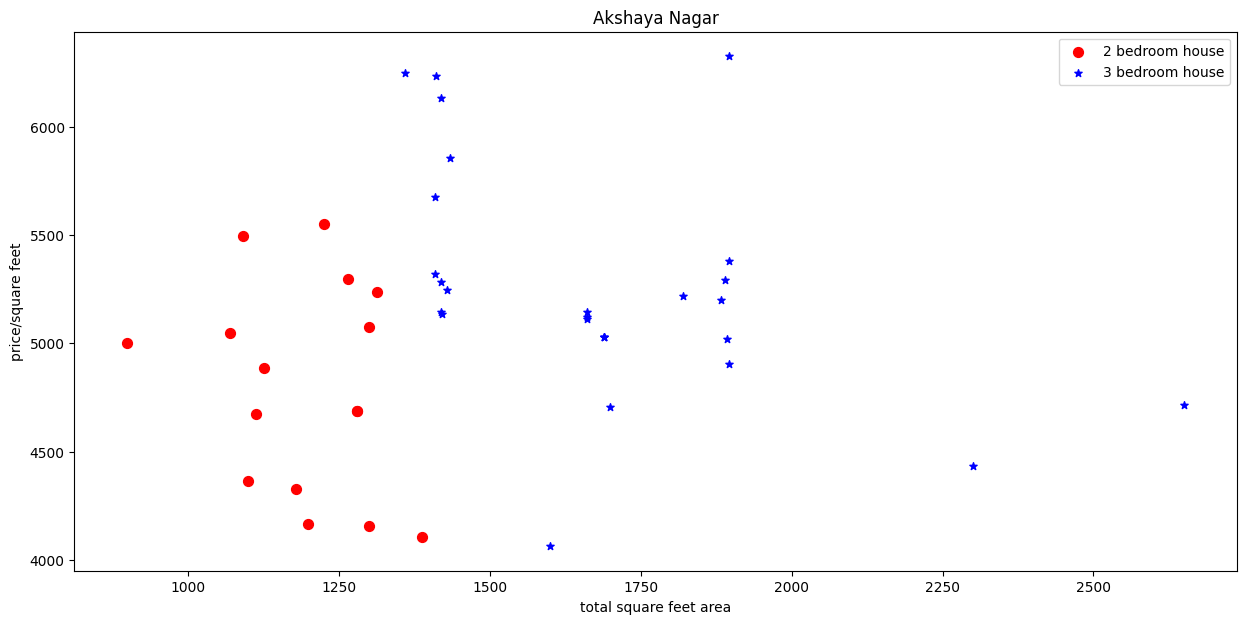

In [37]:
scatter_plt(df_cleaned, "Akshaya Nagar")